In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# converting the 2D pixel array to 1D array
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [ ]:
#normalising--> coverting the input(x) in the range of[0,1] for better performance
x_train_flattened = x_train_flattened/255
x_test_flattened = x_test_flattened/255

In [ ]:
#building a model with hidden layers
model=Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8807 - loss: 0.4275
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9649 - loss: 0.1189
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9766 - loss: 0.0791
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9824 - loss: 0.0578
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9873 - loss: 0.0441


In [ ]:
#evaluating or checking the model
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0954


[0.07872726023197174, 0.9761999845504761]

In [ ]:
#predicting with the model
y_predicted=model.predict(x_test_flattened)
y_predicted[4]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.5373986e-02, 1.7361335e-05, 8.0161570e-03, 9.7727701e-05,
       9.9987489e-01, 6.8674688e-03, 9.7086187e-03, 2.5424624e-02,
       1.0796175e-02, 9.6806109e-01], dtype=float32)

In [28]:
len(y_predicted)

10000

In [ ]:
np.argmax(y_predicted[4])

np.int64(4)

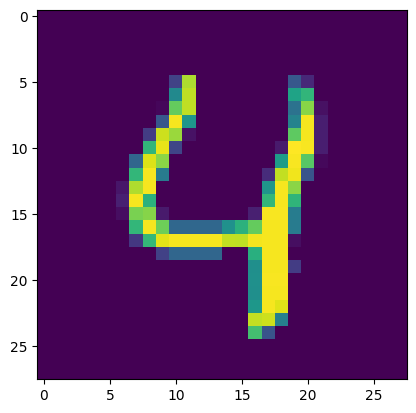

In [ ]:
x_test_flattened[4]
plt.imshow(x_test[4]) # analysing the predicted and tested value which the model provided correclty with error of 0.095 only

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9925 - loss: 0.0231
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9967 - loss: 0.0122
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9971 - loss: 0.0100
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9971 - loss: 0.0100
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9976 - loss: 0.0080


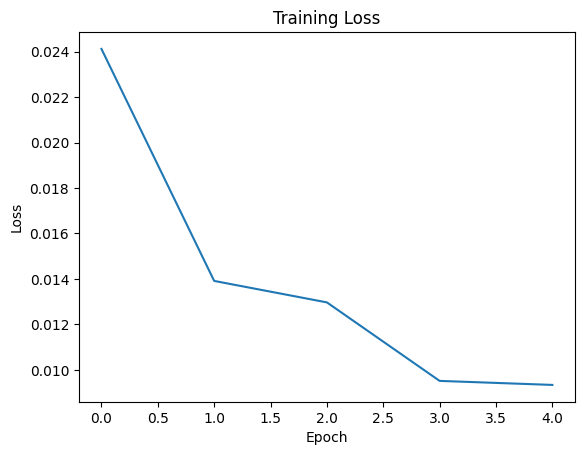

In [ ]:
#plotting training loss
history = model.fit(x_train_flattened, y_train, epochs=5, validation_split=0.2)

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


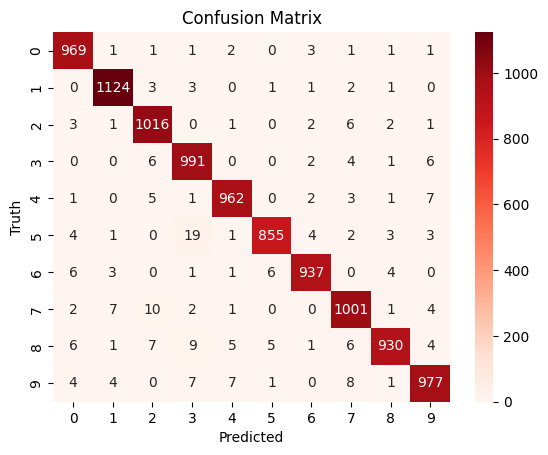

In [27]:
#plotting a confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = confusion_matrix(y_test, y_predicted_labels)

sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that the model achieves high accuracy across all classes, with most predictions falling along the diagonal, indicating correct classifications. The training loss curve further supports this, showing a significant and steady decrease in loss over the epochs, which reflects successful learning and optimization by the model.
